# PACMAN
#### A Hubble Reduction Pipeline for Exoplanet Atmospheres
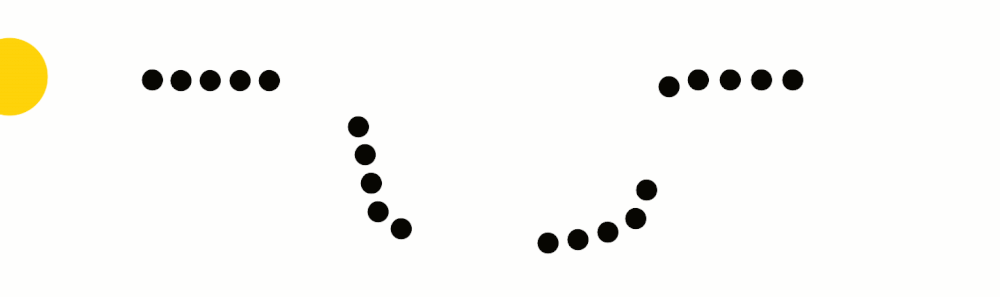

[Animation Credit](https://pacmandocs.readthedocs.io/en/latest/index.html)

# Table of Contents
* [Introduction](#intro)
* [Installation](#install)
    * [Preparing Your Directories](#direct)
* [Downloading the Data](#data)
    * [MAST Archive](#mast)
* [Running PACMAN](#pacman)
    * [Stage 00](#stage-00)
    * [Stage 01](#stage-01)
    * [Stage 02](#stage-02)
    * [Stage 03](#stage-03)
    * [Stage 10](#stage-10)
    * [Stage 20](#stage-20)
    * [Stage 30](#stage-30)
* [Understanding the Light Curve Parameters](#lc)

## Introduction <a class="anchor" id="intro"></a>
Characterizing planetary atmospheres is at the forefront of exoplanet research. The primary method in atmospheric characterization relies on detecting absorption by the atmosphere of the planet as it passes in front of its host, described in the visual below:

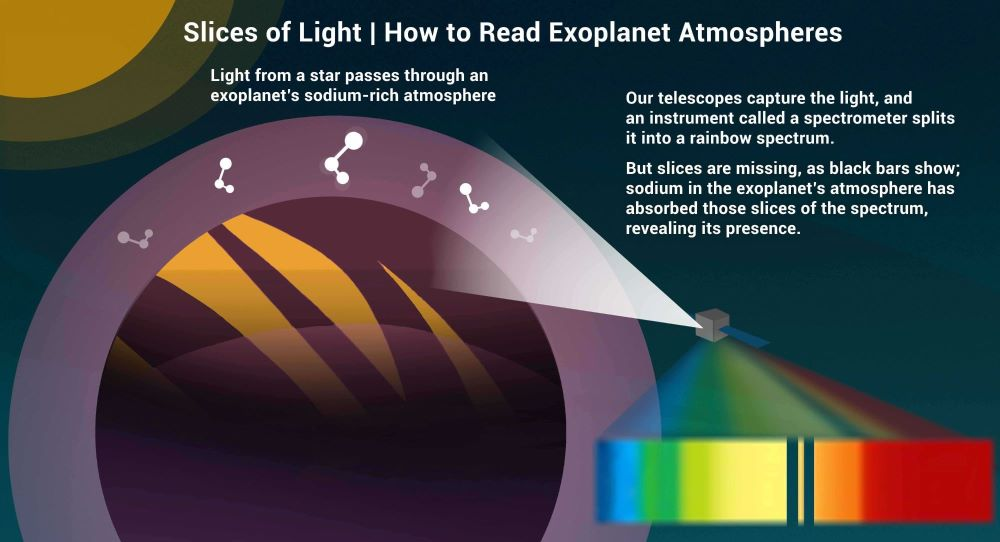

 Despite how faint these signals are, strides in the development of robust and efficient data reduction pipelines have bolstered research efforts in our continued understanding of these objects. This lesson will guide you through the Python module PACMAN ([Zieba & Kreidberg (2022)](https://ui.adsabs.harvard.edu/abs/2022JOSS....7.4838Z/abstract)) providing descriptions of each step, what input you need to provide to the pipeline, and an example to reduce your own data to a spectroscopic light curve!

 <div class="alert alert-block alert-warning">

**NOTE**: PACMAN is run exclusively through terminal commands. If you need guidance on how to navigate your terminal environment, [this](https://realpython.com/terminal-commands/) is a great resource that covers all operating systems.

### Preparing Your *Data* and *Run* Directories <a id="direct"></a>
PACMAN utilizes two directories: a *run* directory and a *data* directory. The *run* directory is where PACMAN will **perform all of its data reduction and output results**. You can think of this as a sort of **workbench**. The *data* directory is where all of your unprocessed image files (.ima) are. This can be thought of as a sort of **storage box**. 

All you need to put in your *data* directory are the images files you will download in the next section. For the run directory, you will need to download three files: *pacman_script.py*, *fit_par.txt*, and *obs_par.pcf*, which will be explained a bit further down. You can find the three files [here](https://downgit.github.io/#/home?url=https:%2F%2Fgithub.com%2Fsebastian-zieba%2FPACMAN%2Ftree%2Fmaster%2Fsrc%2Fpacman%2Fdata%2Frun_files) (A download will start in your browser!) If you want more clarity or **examples** on how to **set up your directories**, check this tutorial [here](https://pacmandocs.readthedocs.io/en/latest/before_running.html).

## Accessing and Downloading Data <a id="data"></a>

There are two primary ways to **download Hubble data**: programmatically via *astroquery*, and through browser via the MAST portal. The PACMAN documentation has a great [tutorial](https://pacmandocs.readthedocs.io/en/latest/astroquery_visits.html) on how to fetch data via *astroquery*. In this tutorial, we will download the data via MAST as an alternative method.

### [MAST Archive's Hubble Search](https://mast.stsci.edu/search/ui/#/hst) <a id="mast"></a>

MAST has employed a specialzed search portal for Hubble and JWST data that gives the user great control of the data sets they search for. We will analyze data from GJ1214 b, a Neptune-like planet orbiting an M dwarf star only 47.5 light years away. Read about it [here](https://en.wikipedia.org/wiki/GJ_1214)!

This query will look at two observations between March 13th and March 15th, 2013. To begin, enter "GJ1214" in the "Object name(s) and/or RA and Dec" field. Then, enter "13021" for the "Proposal ID associated with observation." Lastly, enter "2023-03-13" and "2023-03-15" in the "Find data observed on or between these dates" fields, leaving the time fields blank. **Do not change any other fields from their default**. This is what your query should look like:

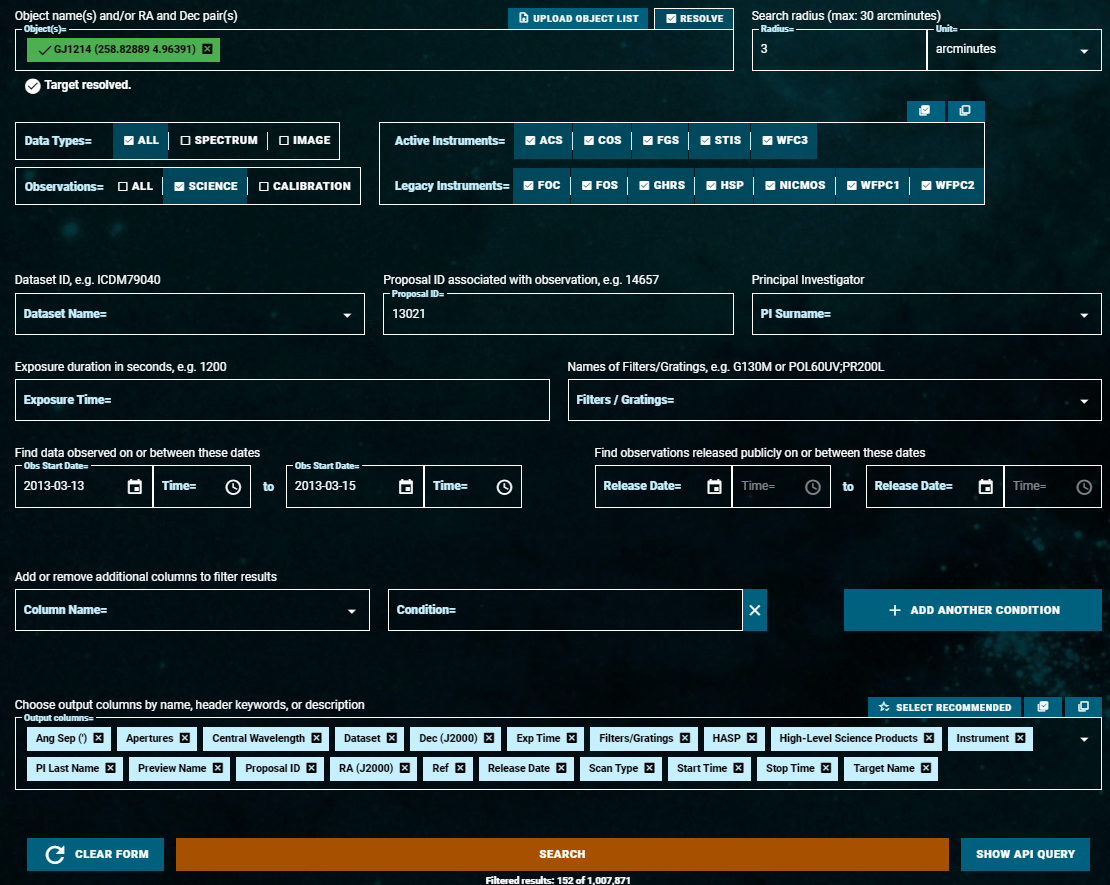

This should lead you to a long list of files with many columns of metadata, like shown below:

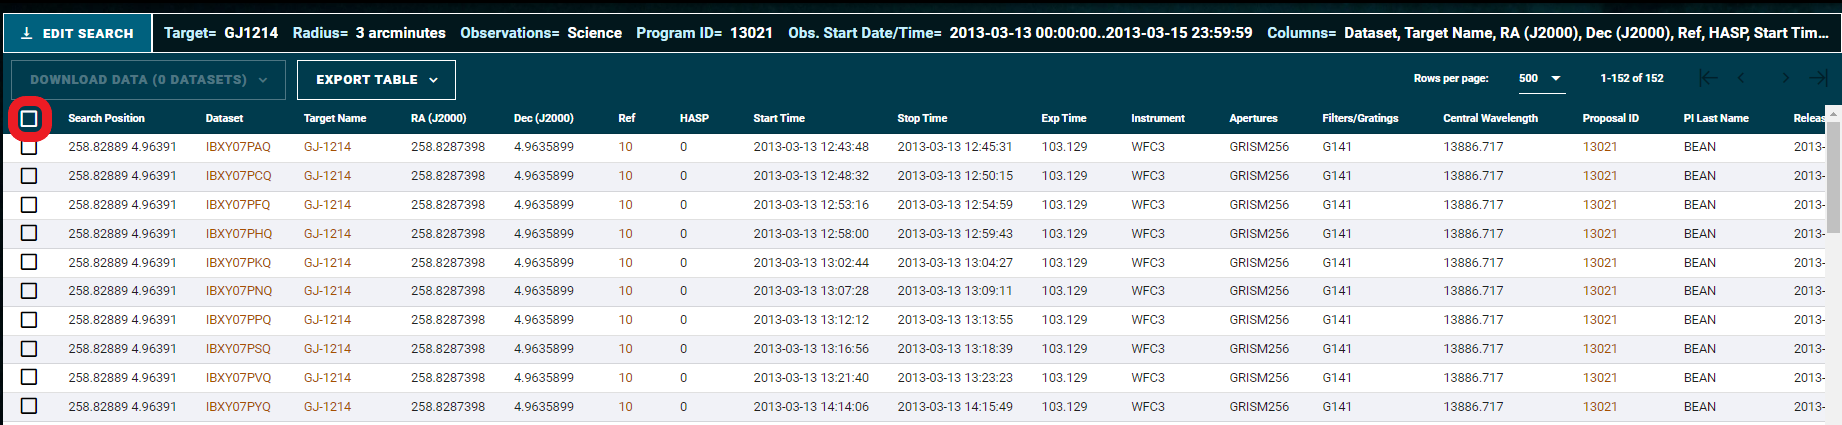

From here, you will want to select all the files by clicking the box outlined in red in the image above. Once selected, click "Download Data" and the "Choose Files" option. This will take you to a new menu, where you will select the data products you want. Under the "Calibrated" category, select the "IMA" files, as such:

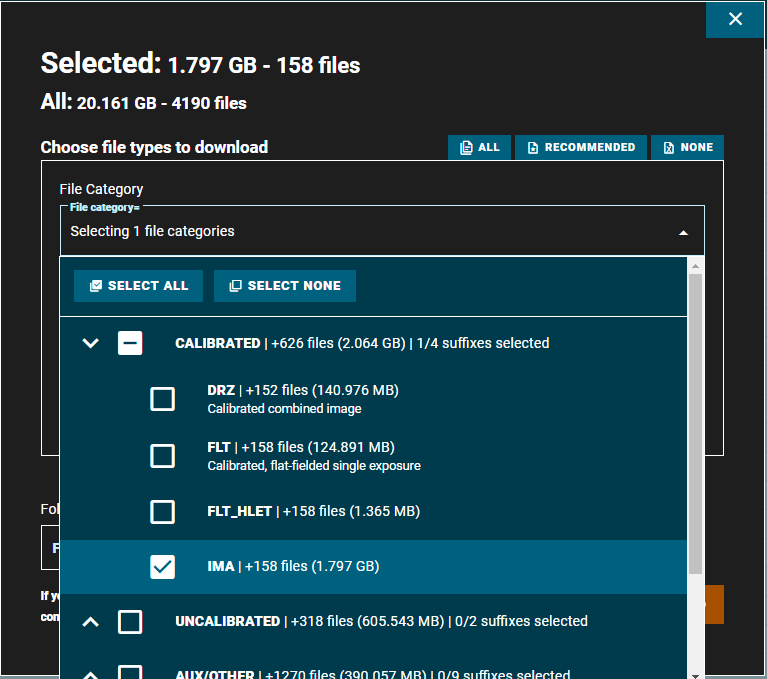

Lastly, select "FLAT" under "File Structure," as this will make moving the data to the right directory much easier! 

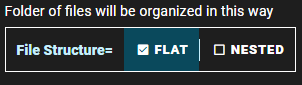


<div class="alert alert-block alert-warning">
<b>IMPORTANT:</b> ONLY SELECT THE IMA FILES. All other files are unnecessary, and some can be quite large! PACMAN will download all ancillary files needed automatically. Click download, and you should get a .zip file. Once you do, all you have to do is unzip your files in your data directory, and you are finished downloading the data!
</div>

## Running PACMAN <a id="pacman"></a>

As mentioned before, you will want the *pacman_script.py*, *obs_par.pcf*, and *fit_par.txt* in your "run" directory. The Python file is simply the executable you will continually run with different flags to reduce the data. The .pcf file contains all relevant information pertaining to your specific data set! This is where most user-input is required. We will adjust the PCF file as needed as we run each stage of PACMAN.

### Stage 00 <a id="stage00"></a>
The lines for Stage 00 in the PCF file look like:

```
# 00
rundir                       /home/zieba/Desktop/Projects/Observations/Hubble/GJ1214_13021 # location of run dir
datadir                      /home/zieba/Desktop/Data/GJ1214_Hubble13021        # location of data dir
suffix                       ima                                                # data suffix (only ima supported right now)
which_visits                 everything                                          # which visits to use; Options: list (e.g., [0,1,3]) or everything

save_obs_times_plot          True
show_obs_times_plot          False
```

These are mostly self explanatory, with the first two lines being your *run* and *data* directories mentioned before. The image suffix will necessarily be .ima for this use case. The "which_visits" will usually be "everything"; however, the numbering corresponds to the temporal order of individual visits within the data directory (e.g. [0] is the first visit in the data directory, [1] is the second). You will want to save the observation plots to troubleshoot potential issues, and you can optionally tell Python to show either as they are produced. After these are appropriately adjusted in the PCF files, we can run Stage 00 by running the following **while in the *run* directory**:

In [1]:
! python pacman_script.py --s00 --eventlabel='GJ1214_Hubble13021'`

/bin/bash: -c: line 1: unexpected EOF while looking for matching ``'
/bin/bash: -c: line 2: syntax error: unexpected end of file


The event label is what your files and runs will be marked as; if you are analyzing many targets, it is important to stay organized! The '--s00' is the stage flag. We will use this to prompt the different stages of PACMAN after we are satisfied with the results of the previous stage. **It is important to check your output after each stage to make sure everything looks okay before proceeding, since the results of previous stages determines the output of the next stage**. 

You have probably seen the terms 'orbit,' 'visit,' and 'images' a lot, and they each have a specific meaning:

- **Visit**: The term used to describe the whole observation period of a set of data. When a researcher gets time to observe with Hubble, all of that data is part of that 'visit.' For exoplanets specifically, this means that you will observe ***one transit***. Thus, multiple visits will include multiple, but different in time, transits.
- **Orbits**: *Within a visit*, Hubble will make *several orbits*, as its orbital period is about 95 minutes. Thus, within an observation window of 12 hours, Hubble will make around 7.5 orbits. Since Hubble cannot keep line of sight of most objects during parts of the orbit, images will have gaps during this time.
- **Images**: Within an orbit, Hubble will take *several images* that contain either a direct image or a spectroscopic image. Ultimately, PACMAN reduces these images, but needs to take into account the timing differences associated with both different visits and orbits to accurately compile and reduce data. 

If run correctly, the output in the terminal will read:

```
['--s00', '--eventlabel']
False
--s00
--eventlabel
eventlabel:  GJ1214_Hubble13021

Starting s00
Location of PACMAN: /data/whitsett.n/PACMAN/src/pacman
Location of the new work directory: /nfshome/whitsett.n/Pacman/GJ1214/run_2024-02-21_13-36-46_GJ1214_Hubble13021
pcf and fit_par files copied to the new work directory /nfshome/whitsett.n/Pacman/GJ1214/run_2024-02-21_13-36-46_GJ1214_Hubble13021
Found 158 data file(s) ending in ima.fits
Reading in files and their headers: 100%|############################################################################################################################################################| 158/158 [00:01<00:00, 94.95it/s]
Determining orbit(s) and visit(s): 100%|#########################################################################################################################################################| 158/158 [00:00<00:00, 315121.27it/s]
Writing table into filelist.txt
Saving Metadata
Finished s00 
```

The actual result should be a simple graph in your *run* directory under the "figs" folder:

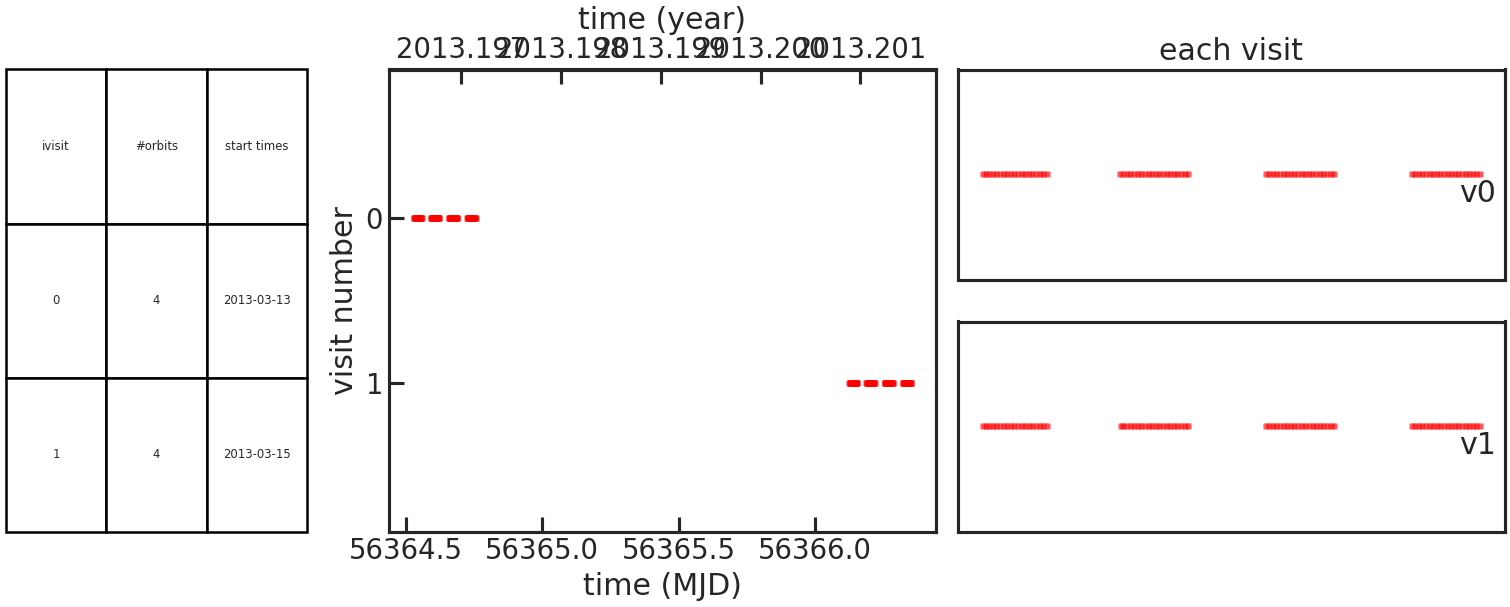

**What does Stage 00 do?**

This is mostly housekeeping and an inventory of observation dates and times for each visit. This will be used to query appropriate ancillary files in the consequent stages.

 <div class="alert alert-block alert-warning">
 
***IMPORTANT***: The PCF you used for Stage 00 is located in the *run* directory. Once you begin running PACMAN, your outputs will be stored in a new folder in the *run* directory that has the format "run_*date*_*eventlabel*" that has a new PCF file. **THIS IS THE NEW PCF FILE YOU WILL USE/CHANGE FOR THE REST OF THE STAGES**. 
</div>

### Stage 01 <a id="stage01"></a>

Stage 01 does not require any editing of the PCF file. Simply run this command:

In [ ]:
! python pacman_script.py --s01

Which should output a message:

```
all directories in script directory: ['2024-02-21_13-36-46']
most recent directory time: 2024-02-21_13-36-46
workdir:  /nfshome/whitsett.n/Pacman/GJ1214/run_2024-02-21_13-36-46_GJ1214_Hubble13021
eventlabel:  GJ1214_Hubble13021
Successfully reloaded meta file
Starting s01
Retrieving Horizons file for every visit: 100%|##########################################################################################################################################################| 2/2 [00:00<00:00,  2.17it/s]
Saving Metadata
Finished s01
```

**What does Stage 01 do?**

Stage 01 uses the metadata of the files in the data directory to query and download a file called a *Horizons System* file. (Learn more about the Horizon System [here!](https://ssd.jpl.nasa.gov/horizons/)) This file essentially tells us the location and velocity of the Hubble Telescope as a function of time, so that the observation times can be computed most accurately. 

### Stage 02 <a id="stage02"></a>

Stage 02 only has two lines in the PCF file, which look like:

```
## 02 barycorr
save_barycorr_plot           True                                               # save a plot with locations of HST?
show_barycorr_plot           False
```

This just asks if we want to save the graph of Hubble's motion in space as a function of time. Typically, we save this information for troubleshooting reasons. We can then run Stage 02 by the same syntax as before:

In [ ]:
! python pacman_script.py --s02

With the following output if successful:

```
all directories in script directory: ['2024-02-21_13-36-46']
most recent directory time: 2024-02-21_13-36-46
workdir:  /nfshome/whitsett.n/Pacman/GJ1214/run_2024-02-21_13-36-46_GJ1214_Hubble13021
eventlabel:  GJ1214_Hubble13021
Successfully reloaded meta file
Starting s02
Converting MJD to BJD: 100%|#############################################################################################################################################################################| 2/2 [00:00<00:00,  2.01it/s]
Correcting orbit and visit times to BJD: 100%|###################################################################################################################################################| 158/158 [00:00<00:00, 508986.20it/s]
Writing t_bjd into filelist.txt
Saving Metadata
Finished s02
```

The output graph(s) should look like:

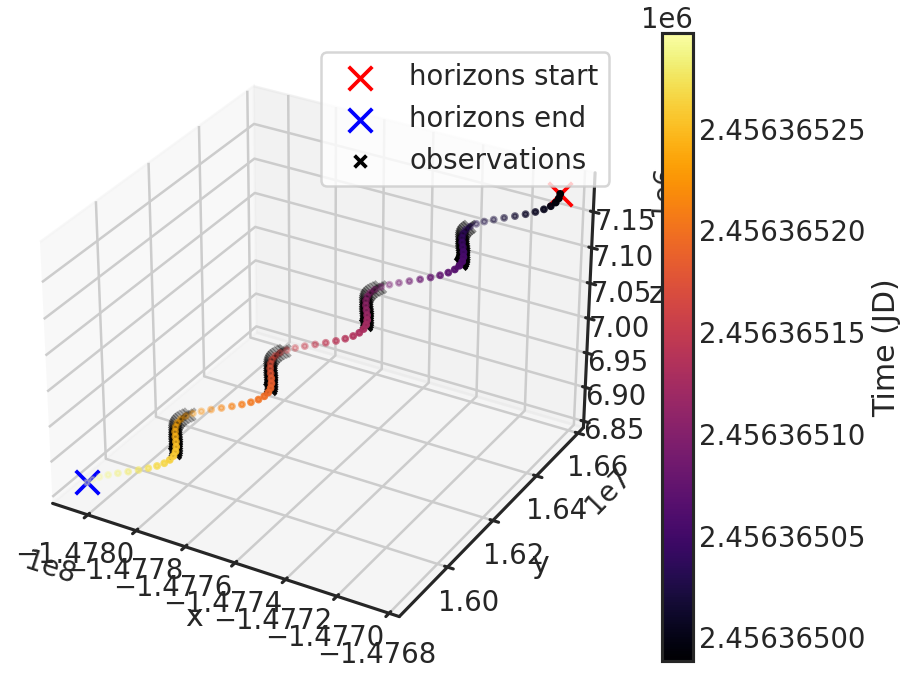

***What does Stage 02 do?***

Stage 02 compiles the information from the Horizon file from Stage 01 into positional and trajectory information about Hubble in particular reference to our observations. This is essentially a form of calibration before we analyze the spectra and generate light curves.

### Stage 03 <a id="stage03"></a>
To prepare for stage 03, we need to edit the PCF, which has the following inputs as shown below:

```
## 03
Teff                         3250                                               # effective temperature of the star
logg                         5.026                                              # surface gravity of the star
MH                           0.29                                               # metallicity of the star
sm                           k93models                                          # stellar model. Options: blackbody, k93models, ck04models or phoenix

smooth                       True                                               # smooth stellar spectrum using a gaussian kernel
smooth_sigma                 441

save_smooth_plot             True
show_smooth_plot             False

save_refspec_plot            True                                               # save a plot showing the stellar model, bandpass and the product of them?
show_refspec_plot            False
```

The first four lines correspond to the **stellar parameters of your planet's host star**. In this case, the values are filled in for you, but it is an important exercise to be able to find these yourself. This can be done, for example, by using the [NASA Exoplanet Archive Planetary Systems Catalog](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PS). Simply type in the planet name (GJ 1214 b) and find the corresponding $T_{eff}$, $\log(g)$ and metallicty of the star by selecting the appropriate columns. The values above are from a particular analysis performed by [Cloutier et al. 2021](https://ui.adsabs.harvard.edu/abs/2021AJ....162..174C/abstract)! Other possible values include $T_{eff} = 3170; \; \log(g) = 4.944 ; \; MH = 0.29$. Feel free to keep the default, or change to these values, as different analyses will yield different results. **It is worth looking into individual analyses to find the best parameters! This is an active area of research, so these values are constantly refined**.

The "sm" parameter is the stellar model. If you choose any model other than "blackbody," you will need to supply the log(g) and metallicity parameters, but these are typically readily available. The "smooth" and "smooth_sigma" parameters dictate how the spectrum model are treated, and typically this should not be adjusted until a good reason arises. As with the other plot options, determine whether you want to save/see the spectrum smoothing plots and/or the reference spectrum plots.

Once you are happy with the inputs, we can run Stage 03:

In [ ]:
! python pacman_script.py --s03

If everything ran correctly, you should get an output similar to:

```
all directories in script directory: ['2024-02-21_13-36-46']
most recent directory time: 2024-02-21_13-36-46
workdir:  /nfshome/whitsett.n/Pacman/GJ1214/run_2024-02-21_13-36-46_GJ1214_Hubble13021
eventlabel:  GJ1214_Hubble13021
Successfully reloaded meta file
Starting s03
Using k93models model.

Possible metallicities: [ 1.   0.5  0.3  0.2  0.1  0.  -0.1 -0.2 -0.3 -0.5 -1.  -1.5 -2.  -2.5
 -3.  -3.5 -4.  -4.5 -5. ]
For input metallicity 0.29, closest metallicity is 0.3. 

Possible effective temperatures: [10000. 10500. 11000. 11500. 12000. 12500. 13000. 14000. 15000. 16000.
 17000. 18000. 19000. 20000. 21000. 22000. 23000. 24000. 25000. 26000.
 27000. 28000. 29000. 30000. 31000. 32000. 33000. 34000.  3500. 35000.
  3750. 37500.  4000. 40000.  4250. 42500.  4500. 45000.  4750. 47500.
  5000. 50000.  5250.  5500.  5750.  6000.  6250.  6500.  6750.  7000.
  7250.  7500.  7750.  8000.  8250.  8500.  8750.  9000.  9250.  9500.
  9750.]
For input effective temperature 3250, closest temperature is 3500.0.

Was the stellar model fits file called kp03_3500.fits already downloaded?: False 

              + Downloading file kp03_3500.fits from https://archive.stsci.edu/hlsps/reference-atlases/cdbs/grid/k93models/kp03/kp03_3500.fits.
Possible logg: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
For input logg 5.026, closest logg is 5.0.

Using g141 grism.
Saving Metadata
Finished s03 
```

***What does Stage 03 do?***

When looking for exoplanet atmospheres, our sensitivity to the absorption signals are strongly dependent on our ability to characterize both our instrument's bandpass (i.e. how efficient is Hubble at observing in a particular wavelength range?) and the host's spectrum. Astronomers have developed a variety of different stellar spectrum models, each with their own advantages and disadvantages. For instance, the *blackbody* model has the advantage of describing the stellar spectrum using only effective temperature as input; however, the downside is this model is often too simplistic, and ignores strong absorption lines present in many stars. Thankfully, stellar spectra can be accurately modeled by the parameters used above. The [PHOENIX spectrum library](https://www.aanda.org/articles/aa/full_html/2013/05/aa19058-12/aa19058-12.html) is particularly powerful, and is readily implemented in various [Python modules](https://pypi.org/project/expecto/). Stage 03 models the host star, as well as the Hubble bandpass, and uses [Gaussian kernel smoothing](https://en.wikipedia.org/wiki/Kernel_smoother) to take the discreet spectrum, and make them effectively continuous. This is visualized in the output of Stage 03:

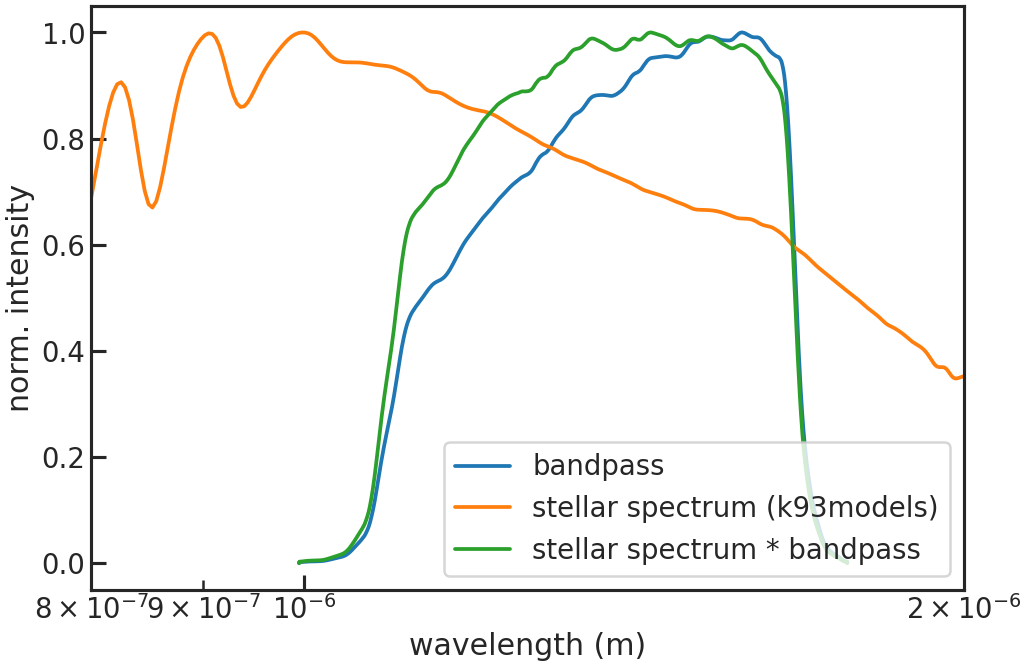

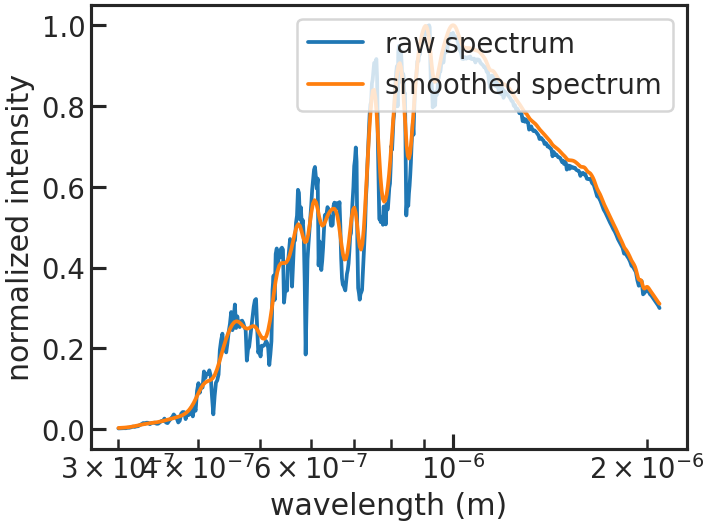

### Stage 10 <a id="stage10"></a>

The lines for Stage 10 in the PCF file look like:

```
## 10
di_rmin                      120                                                # coordinates (row min max and column min max) where the star in the direct image is
di_rmax                      160
di_cmin                      5
di_cmax                      50

save_image_plot              True                                               # save plot with direct image and best fit?
show_image_plot              False

di_multi                     median
```

We can start Stage 10 by running:

In [ ]:
! python pacman_script.py --s10

If everything ran smoothly, you should get an output similar to:

```
all directories in script directory: ['2024-02-21_13-36-46']
most recent directory time: 2024-02-21_13-36-46
workdir:  /nfshome/whitsett.n/Pacman/GJ1214/run_2024-02-21_13-36-46_GJ1214_Hubble13021
eventlabel:  GJ1214_Hubble13021
Successfully reloaded meta file
Starting s10
Determining Source Positions for Direct Images: 100%|#####################################################################################################################| 8/8 [00:10<00:00,  1.27s/it]
There is one DI per orbit.
Saving Metadata
Finished s10 
```

***What does Stage 10 do?***

This step locates the *centroid* of the host star from the direct image that primes the spectroscopic observations. When Hubble takes spectroscopic data for a star, a primer image is used (usually a much shorter exposure time and a different filter) to determine the star's location, to be used when the spectroscopic images are taken. Step 10 takes a box in the primer image to automatically detect the target star's centroid. To do this, run the script first to get a visual plot of the image, even if the box is far off. Then, you can see where the box should be placed, and then go back and change the PCF settings (remember, the PCF in the new run folder!!) for your new guess. Here is an example:

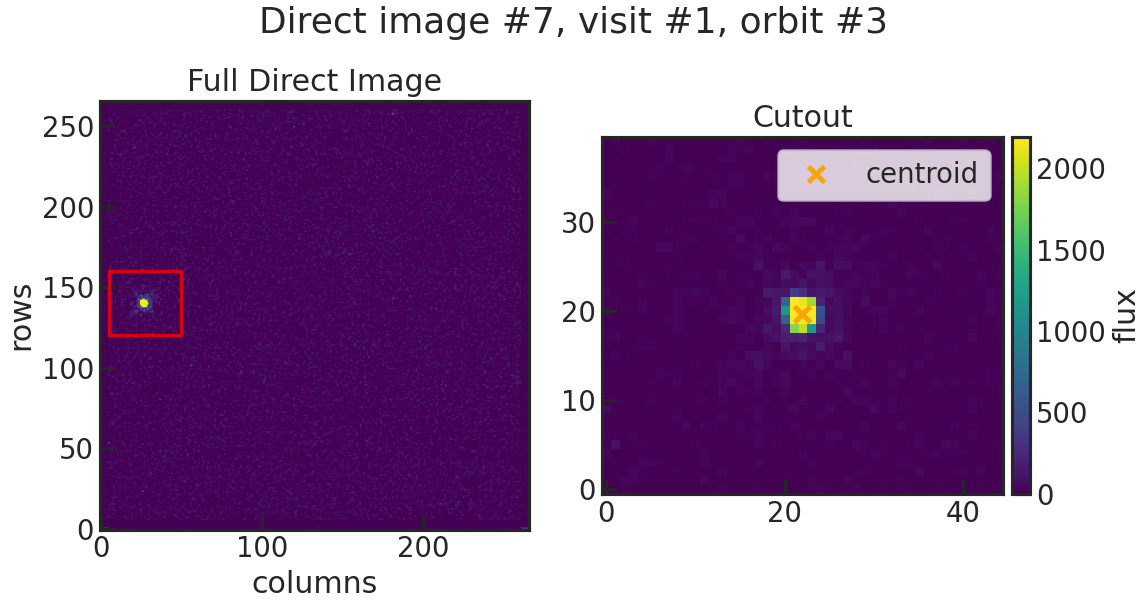

In this case, the box was defined well. But, if it was not, this output allows us to visually estimate which row and columns to put in the PCF file. It is clear that the default values in the PCF file of columns 5 - 50 ('di_cmin' + 'di_cmax', respectively) and rows 120 - 160 ('di_rmin' + 'di_rmax', respectively) work well. If the star you are observing is a binary, this becomes a more important step! Typcially, though, targets are selected so that binary stars are easily resolvable. The "di-multi" parameter is used if you have multiplied direct images from which to source the target position. This can either be "median", which takes the median position from all direct images, or "latest" taking the latest position of the last orbit. Typically, we keep this on median, unless there is a good reason to change it.

### Stage 20 <a id="stage20"></a>

Stage 20 where the bulk of the work happens! In your PCF file, you'll note this has many more entries than the previous stages:

```
## 20
s20_testing                  False
n_testing                    4

rmin                         5
rmax                         261

window                       12

opt_extract                  True
sig_cut                      15                                                 # optimal extraction, for cosmic rays etc
nsmooth                      9                                                  # optimal extraction, created smoothed spatial profile, medial smoothing filter

output                       True

correct_wave_shift           True
correct_wave_shift_refspec   True

background_thld              1000                                               # background threshold in counts

background_box               False
bg_rmin                      100
bg_rmax                      400
bg_cmin                      40
bg_cmax                      100

save_optextr_plot            True

save_sp2d_plot               True                                              # save plot of 2d spectrum
show_sp2d_plot               False

save_trace_plot              True                                              # save plot of trace
show_trace_plot              False

save_bkg_hist_plot           True                                              # save histogram of fluxes
show_bkg_hist_plot           False

save_utr_plot                True                                              # save plot of individual up-the-ramps
show_utr_plot                False

save_sp1d_plot               True                                              # save plot of 1d spectrum
show_sp1d_plot               False

save_bkg_evo_plot            True                                               # save plot of the background flux over time
show_bkg_evo_plot            False

save_sp1d_diff_plot          True                                              # save difference plot of consecutive 1d spectra
show_sp1d_diff_plot          False

save_utr_aper_evo_plot       True                                               # save plot of aperture size over time
show_utr_aper_evo_plot       False

save_refspec_fit_plot        True                                              # save plot of fit of the 1d spectrum to the refspec
show_refspec_fit_plot        False

save_drift_plot              True                                               # save plot of 1d spectrum drift over time
show_drift_plot              False
```

Wow, that's a lot! Now, luckily most of these are plots that we will save, so only the first 17 entries are of interest. To understand these parameters better, it is worthwhile to know what is being done in the first place. The spectra are 2D images, like shown below:

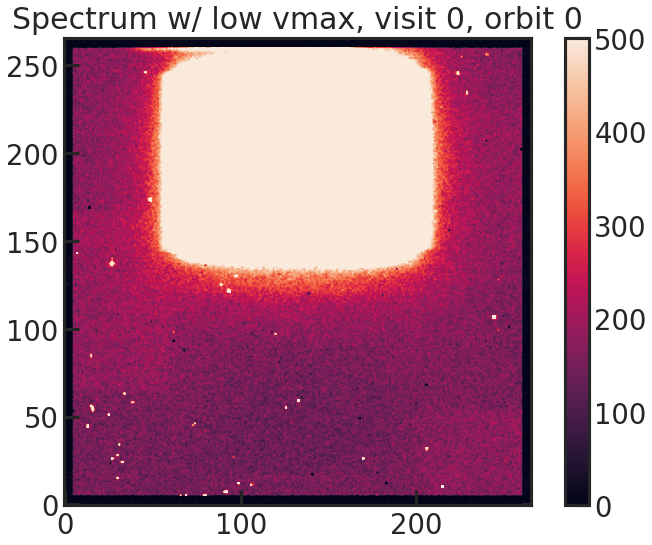

This has a deceptive amount of information in it! As you probably know, a spectrum represents the amount of flux per unit wavelength. The way the Hubble g141 grism spectrometer works is by scanning up and down the spectrometer, and each composite image represents one 'scan' across the component that samples the different wavelengths of the spectrometer. So, in reality, each .ima file actually has around a dozen 'sub-images' that corresponds to the intensity at each wavelength supported by the spectrometer (in our case $10-20 \mu m$). Extracting information from these 'sub-images' requires profile fitting (i.e. determining the position of the data in each image) and extracting the relevant pixels through a process called [**optimal extraction**](https://ui.adsabs.harvard.edu/abs/1986PASP...98..609H/abstract). This is a systematic way to retrieve the best spectrum profile from each 'sub-image'. Here is an example of this process in action:

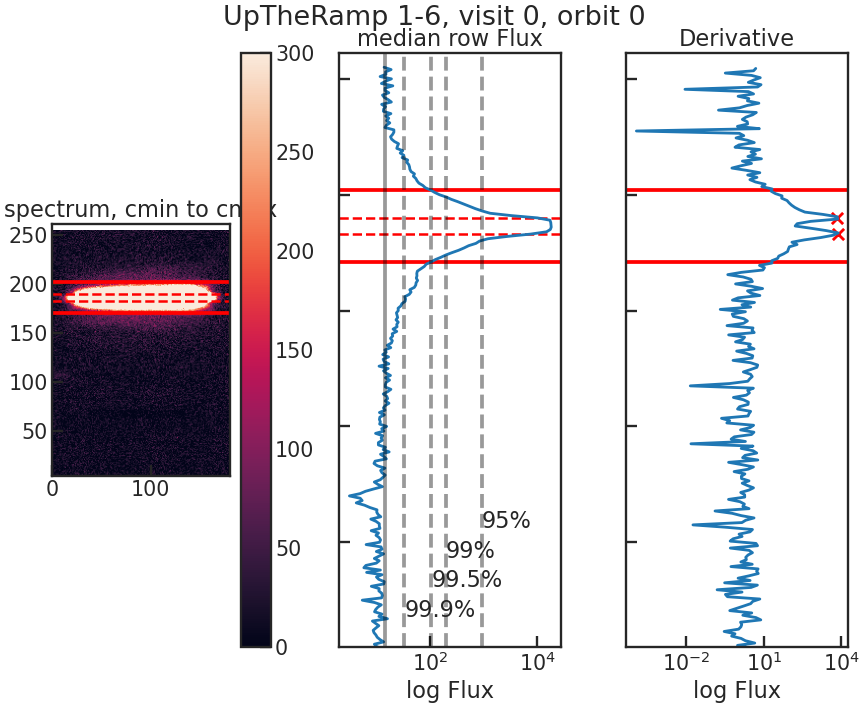

So, how do we set up the PCF knowing this? The first parameter, 's20_testing' should be False, as it provides a way to quickly analyze the 'n_testing' number of images to perform test analysis on to see if the data looks good. This might be a good idea if you have **many** images (the optimal extraction process takes time!), and there are some concerns on data quality, but in this case is not required. 

'rmin' and 'rmax' are the rows that should be considered for optimal extraction of the profiles. The presets are good in this case, and should not need to be changed unless motivated otherwise.

The 'window' option is the number of rows to add above and below the optimal profile determined by PACMAN. 15 is a safe number here, and like before, should not be changed unless motivated otherwise.

'opt_extract' determines if optimal extraction should be used or not. If set to False, a faster, more 'quick-and-dirty' method will be applied for a quick look at the spectra, but subsequent stages of PACMAN will break otherwise. So, keep it True,

'sig_cut' determines the outlier threshold (in standard deviations $\sigma$). **When you go to extract light curves, and you are getting a lot of 'NANs', this value should be increased, up to ~100s if needed.** This is important if there are particularly bad quality pixels in your images.

'nsmooth' is the number of pixels used for median-smoothing the spatial spectral profile (essentially binning.) It is good at 9.

'correct_wave_shift' and 'correct_wave_shift_refspec' are necessary to account for any drift in the profiles over the observation, which uses the reference spectrum from Stage 03 to calibrate. Keep these True.

Finally, 'background_thld' is the upper bound for pixel intensities to be considered background. Anything lower than this number is considered background, and the background is subtracted by the median of all pixels lower than this value. The other parameters below this allow you to specify where you want to sample the background, with the same parameters as used in Stage 10 for centroid fitting. This can be set to False in our case, but poor quality data might make this useful for particular observations.

Now, let's run Stage 20:

In [ ]:
! python pacman_script.py --s20

Due to how extensive the outputs are, we will not go over them individually, but you should be looking at your 'fig' folder occasionally to see the sort of outputs that are being generated as it runs! See full descriptions on the [PACMAN documentation website](https://pacmandocs.readthedocs.io/en/latest/pcf.html). If everything is running smoothly, you will have a similar output below, with varying degrees of progress:

```
--- Looping over up-the-ramp-samples: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:28<00:00,  2.06s/it]


***************** Looping over files:  57%|██████████████████████████████████████████████████████████████████████▎                                                     | 85/150 [44:38<33:09, 30.61s/it]
Filename: /data/whitsett.n/Pacman_Data/GJ1214/ibxy06deq_ima.fits
current visit, orbit:  (1, 4)
--- Looping over up-the-ramp-samples: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:29<00:00,  2.09s/it]


***************** Looping over files:  57%|███████████████████████████████████████████████████████████████████████                                                     | 86/150 [45:09<32:43, 30.69s/it]
Filename: /data/whitsett.n/Pacman_Data/GJ1214/ibxy06dfq_ima.fits
current visit, orbit:  (1, 4)
--- Looping over up-the-ramp-samples:  43%|██████████████████████████████████████████████████████                                                                        | 6/14 [00:13<00:18,  2.32s/it]
```

### Stage 21 <a id="stage21"></a>

The entries for Stage 21 in the PCF are:

```
##21

s21_most_recent_s20          True
s21_spec_dir_path_s20        None

wvl_min                      1.135
wvl_max                      1.642
wvl_bins                     11

use_wvl_list                 False
wvl_edge_list                [11400,12200,12600,13000,14600,15000,15400,15800,16200]
```

A nice reprieve! The first argument asks if you want to generate the spectroscopic light curves from the most recent run of Stage 20. This should be True. The second argument can be used to point to the Stage 20 outputs that you would like to use, if not the latest. The 'wvl_min/max/bins' ask what wavelengths are used in the spectroscopy, which will change from filter to filter, and into how many wavelength bins you'd like to break them into. These are fine as is. The last parameters ask if you would like to use a list to dictate the wavelength binning, and which wavelengths should be the edges if True. We can set this to False for now, but potentially very useful if an analysis is looking for a particular absorption line. Now, let's run Stage 21:

In [ ]:
! python pacman_script.py --s21

Your output should look like this:

```
all directories in script directory: ['2024-02-21_13-36-46']
most recent directory time: 2024-02-21_13-36-46
workdir:  /nfshome/whitsett.n/Pacman/GJ1214/run_2024-02-21_13-36-46_GJ1214_Hubble13021
eventlabel:  GJ1214_Hubble13021
Successfully reloaded meta file
Starting s21

Number of bins: 11
chosen bin edges: [11350.         11810.90909091 12271.81818182 12732.72727273
 13193.63636364 13654.54545455 14115.45454545 14576.36363636
 15037.27272727 15498.18181818 15959.09090909 16420.        ]
Chosen directory with the spectroscopic flux files: /nfshome/whitsett.n/Pacman/GJ1214/run_2024-02-21_13-36-46_GJ1214_Hubble13021/extracted_lc/2024-02-21_18-35-59
***************** Looping over Bins: 100%|##############################################################################################################################| 11/11 [00:01<00:00,  7.39it/s]
Saved light curve(s) in /nfshome/whitsett.n/Pacman/GJ1214/run_2024-02-21_13-36-46_GJ1214_Hubble13021/extracted_sp/bins11_2024-02-21_19-55-29
Saving Wavelength bin file
Saving Metadata
Finished s21 
```

***What does Stage 21 do?***

Stage 21 takes the individual spectra from each ima file extracted in Stage 20, and converts it into flux in a certain bin of wavelength (which we defined above). This process is nicely summarized in the following graphic:

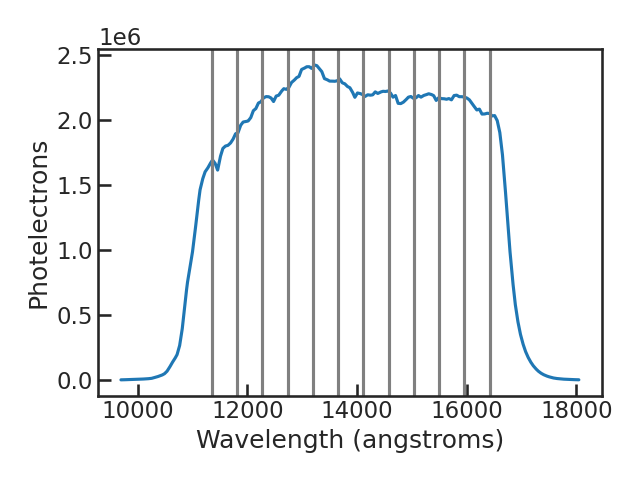

Here the x axis is wavelength, and y is flux intensity (electrons/s). The vertical lines are the bins we defined above. This also generates both 'white' light curves and spectroscopic light curves, which are under the 'extracted_lc' folder in your output folder. These will be analyzed and visualized in stage 30.

### Stage 30 <a id="stage30"></a>

 <div class="alert alert-block alert-warning">
 
***IMPORTANT***: The downloaded PCF file is missing a parameter 'fix_ld'. Add this as a new row, and set it to 'False'. Your PCF for Stage 30 should look like the excerpt below. Feel free to copy and paste this in your PCF file. 
</div>

Your PCF for section 30 will look like this:

```
##30
s30_myfuncs                  ['constant','upstream_downstream','model_ramp','polynomial1','transit']
#s30_myfuncs                  ['constant','upstream_downstream','model_ramp','polynomial1','transit','uncmulti']

s30_fit_white                True
s30_most_recent_s20          True
s30_white_file_path          None

s30_fit_spec                 False
s30_most_recent_s21          False
s30_spec_dir_path            None

remove_first_exp             True
remove_first_orb             True
remove_which_orb             [0]

rescale_uncert               True

run_clipiters                0
run_clipsigma                0

white_sys_path               None

fix_ld                       False
ld_model                     1
use_ld_file                  False
ld_file_path                 /home/zieba/Data/ld_outputfile.txt

toffset                      2456365

run_verbose                  True

save_allan_plot              True
save_raw_lc_plot             True
save_fit_lc_plot             True

run_lsq                      True
run_mcmc                     True
run_nested                   False

ncpu                         1

#emcee
run_nsteps                   4000
run_nwalkers	             30
run_nburn                    2000

#dynesty static
run_dlogz                    0.01
run_nlive                    400

#dynesty dynamic
run_dynamic                  True
run_dlogz_init               0.01
run_nlive_init               100
run_nlive_batch              50
run_maxbatch                 50

run_bound                    multi
run_sample                   rwalk


```

What we are doing is modeling our light curves by correcting for several systematics and physical models of the system. This is outlined in the first parameter 's30_myfuncs'. All of these models are described in detail in the [PACMAN documentation page](https://pacmandocs.readthedocs.io/en/latest/models.html), as well as describing the methods for the 'fit_par.txt' file that is used to put constraints on the **prior distributions of these parameters**. The first two blocks of parameters describes whether we want to analyze the 'white' light curve or the 'spectroscopic' light curve. If we want to do the former, we want 's30_fit_white' and 's30_most_recent_s20' to be set to True. If we want the spectroscopic light curves to be analyzed, we want 's30_fit_spec' and 's30_most_recent_s21' to be True. If we want to use a different instances of stage 20 or stage 21, the 's30_white_file_path' or 's30_white_file_path' can be used to point to those output directories.

The next block of parameters is used to mitigate a systematic quirk of Hubble spectroscopy where the first pass of observations tend to be overwhelmed with systematic error. Occasionally data can be usable, but often times it isn't. Usually, we want to discard the first exposure and orbit, which can be done by toggling these parameters to True. If the systematics are bad for multiple orbits, more than the first can be selected by putting several orbit numbers in the 'remove_which_orb' list. This quirk is usually called **exponential ramping**, and can be seen if you look at the raw light curves in the output of this stage. Learn more about this in section 2.1.1 in [Knutson et al 2014](https://iopscience.iop.org/article/10.1088/0004-637X/794/2/155).

'rescale_uncert' rescales the uncertainty based on the sampler used (MCMC or nested sampling). Keep this True. The 'run_clipiters' and 'run_clipsigma' are untested features, so leave them be until they are fully released.

The next block of parameters concerns a prior model on the limb darkening of the system. We won't touch these here, but can be useful if more is known about the transit.

The 't_offset' is an important parameter, as it subtracts a time constant off of the time stamps in the image data. This can have repercussions in the parameters you pass in the 'fits_par.txt' file, and varies from observation to observation. You can account for this by converting the time of your observations to [BJD time](https://ssd.jpl.nasa.gov/tools/jdc/#/cd).

The plot arguments are the same as always. 

Lastly, you will want to decide which **sampler** to use: MCMC or nested sampling (or both!). There are various advantages and disadvantages to either, but explaining these is beyond the scope of this lesson. Keep the settings as they are.

Now, we can run stage 30 (you may want to do this twice, one for the white light curve, and one for the spectroscopic light curves):

In [ ]:
! python pacman_script.py --s21

You should get an output like this:

```
all directories in script directory: ['2024-02-21_13-36-46']
most recent directory time: 2024-02-21_13-36-46
workdir:  /nfshome/whitsett.n/Pacman/GJ1214/run_2024-02-21_13-36-46_GJ1214_Hubble13021
eventlabel:  GJ1214_Hubble13021
Successfully reloaded meta file
Starting s30
WARNING: AstropyDeprecationWarning: "Reader" was deprecated in version 6.0 and will be removed in a future version. 
        Use "format" instead. [pacman.lib.nice_fit_par]
WARNING: AstropyDeprecationWarning: "Reader" was deprecated in version 6.0 and will be removed in a future version. 
        Use "format" instead. [pacman.s30_run]
White light curve fit will be performed
using most recent s20 run: /nfshome/whitsett.n/Pacman/GJ1214/run_2024-02-21_13-36-46_GJ1214_Hubble13021/extracted_lc/2024-02-21_18-35-59
Identified file(s) for fitting: [PosixPath('/nfshome/whitsett.n/Pacman/GJ1214/run_2024-02-21_13-36-46_GJ1214_Hubble13021/extracted_lc/2024-02-21_18-35-59/lc_white.txt')]

****** File: 1/1


Removed 8 exposures because they were the first exposures in the orbit.
Removed 34 exposures because they were the first orbit in the visit.
median log10 raw flux of full light curve: 8.429980180844982
The highest amount of exposures in an orbit is 18
Number of free parameters:  13
Names of free parameters:  ['t0', 'rp', 'u1', 'c', 'c', 'v', 'v', 'r1', 'r1', 'r2', 'r2', 'scale', 'scale']
The predicted rms is 63.68 ppm

*STARTS LEAST SQUARED*
H11 /nfshome/whitsett.n/Pacman/GJ1214/run_2024-02-21_13-36-46_GJ1214_Hubble13021
H22 fit_white/fit_2024-02-21_20-15-30_GJ1214_Hubble13021
H33 /nfshome/whitsett.n/Pacman/GJ1214/run_2024-02-21_13-36-46_GJ1214_Hubble13021/fit_white/fit_2024-02-21_20-15-30_GJ1214_Hubble13021/lsq_res
DOES IT EXIST False
DOES THIS STILL RUN?
Runs MPFIT... 
/data/whitsett.n/PACMAN/src/pacman/lib/model.py:85: RuntimeWarning: divide by zero encountered in divide
  self.data_nosys = data.flux/self.model_sys
/data/whitsett.n/PACMAN/src/pacman/lib/model.py:86: RuntimeWarning: divide by zero encountered in divide
  self.norm_flux = data.flux/self.model
t0_0     1.8276e-01      1.0250e-05
rp_0     1.1615e-01      8.2543e-05
u1_0     2.6010e-01      5.0892e-03
c_0      8.4302e+00      1.6253e-05
c_1      8.4300e+00      1.6509e-05
v_0      -1.2284e-06     1.1059e-07
v_1      -2.5289e-07     1.1064e-07
r1_0     6.7861e-02      6.1244e-03
r1_1     6.5916e-02      5.4471e-03
r2_0     6.7533e+00      3.2065e-02
r2_1     6.6605e+00      2.9597e-02
scale_0          4.1908e-03      1.7515e-05
scale_1          4.1977e-03      1.7513e-05
rms, chi2red =  122.480430626872 4.206812618533217
Saved white_systematics.txt file

*STARTS MCMC*
rescale_uncert in the pcf was set to True
After the first fit, you got chi2_red >= 1
Errorbars are being rescaled so that chi2_red = 1
H11 /nfshome/whitsett.n/Pacman/GJ1214/run_2024-02-21_13-36-46_GJ1214_Hubble13021
H22 fit_white/fit_2024-02-21_20-15-30_GJ1214_Hubble13021
H33 /nfshome/whitsett.n/Pacman/GJ1214/run_2024-02-21_13-36-46_GJ1214_Hubble13021/fit_white/fit_2024-02-21_20-15-30_GJ1214_Hubble13021/lsq_res
DOES IT EXIST True
DOES THIS STILL RUN?
Runs MPFIT... 
t0_0     1.8276e-01      2.1023e-05
rp_0     1.1615e-01      1.6930e-04
u1_0     2.6010e-01      1.0438e-02
c_0      8.4302e+00      3.3335e-05
c_1      8.4300e+00      3.3861e-05
v_0      -1.2284e-06     2.2682e-07
v_1      -2.5289e-07     2.2692e-07
r1_0     6.7861e-02      1.2561e-02
r1_1     6.5916e-02      1.1172e-02
r2_0     6.7533e+00      6.5767e-02
r2_1     6.6605e+00      6.0704e-02
scale_0          4.1908e-03      3.5925e-05
scale_1          4.1977e-03      3.5919e-05
rms, chi2red =  122.48043062689561 1.0000000000003877
H11 /nfshome/whitsett.n/Pacman/GJ1214/run_2024-02-21_13-36-46_GJ1214_Hubble13021
H22 fit_white/fit_2024-02-21_20-15-30_GJ1214_Hubble13021
H33 /nfshome/whitsett.n/Pacman/GJ1214/run_2024-02-21_13-36-46_GJ1214_Hubble13021/fit_white/fit_2024-02-21_20-15-30_GJ1214_Hubble13021/lsq_res
DOES IT EXIST True
DOES THIS STILL RUN?
Run emcee...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:51<00:00, 78.33it/s]
Saved white_systematics.txt file for mcmc run
The chain is shorter than 50 times the integrated autocorrelation time for 11 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 80;
tau: [140.13371229 201.03436008 264.07587012 107.16863879  99.18463314
  83.37713189  63.98868427 141.997605   157.13517551 131.04879765
 127.53272885  78.62646385  81.54591375]
Autocorrelation time:  [140.13371229 201.03436008 264.07587012 107.16863879  99.18463314
  83.37713189  63.98868427 141.997605   157.13517551 131.04879765
 127.53272885  78.62646385  81.54591375]
Saved fit_results.txt file
Finished s30
```

This gives you the results of the MCMC. And that's it! You've successfully generated a spectroscopic light curve from Hubble data. Here is an example of an output you should see:

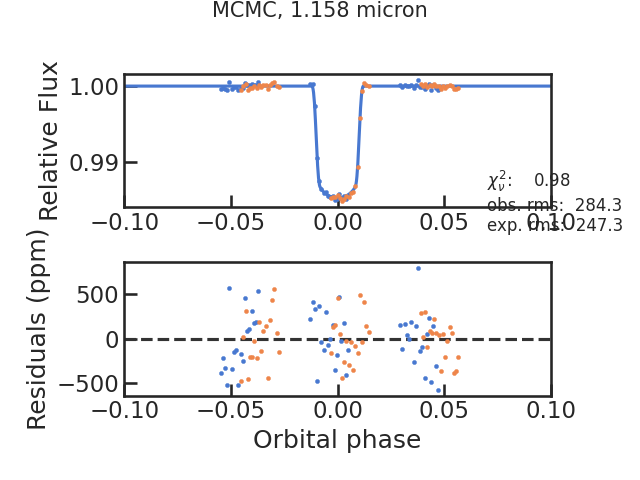

Running the MCMC could take a little time, but explore the outputs as they are generated! Once it's finished, we get our final product, the spectrum:

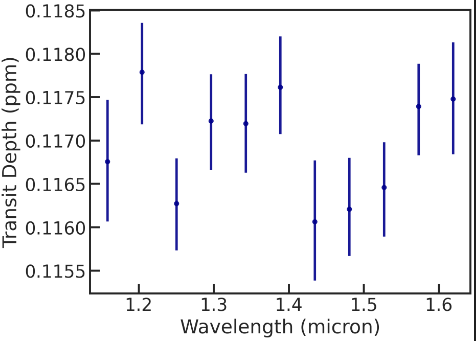

And that's the final data product!

***What does Stage 30 do?***

Stage 30 applies a variety of different models based on known systematic effects of Hubble (i.e. exponential ramping) as well as modeling for the expected light curve based on known exoplanet parameters. We do this so we can most accurately describe the characteristics of the planet of interest, and to verify that our previous understanding of the system is consistent with this new data. Since most of these parameters are not known with certainty, they are described by a **Bayesian prior distribution**. That is, the parameter has a certain probability of being a certain value within this distribution. Since there are many parameters that constitute many prior distributions, we need to sample each of these distributions somehow to fit our models to our data. We do this either through [Markov-Chain Monte Carlo](https://machinelearningmastery.com/markov-chain-monte-carlo-for-probability/) or [Nested Sampling](https://en.wikipedia.org/wiki/Nested_sampling_algorithm) algorithms. PACMAN performs these algorithms for you, but the burden of describing the parameters, their uncertainty, and the types of prior distributions they are described by is the burden of the researcher. The next section will give some resources and pointers on how to approach this problem if you need to use PACMAN in a novel setting.


### Understanding the fit_par.txt File, Parameter Prior Distributions, and Light Curve Models <a id="lc"></a>
The previous section analyzed the light curves without any adjustments into the fit_par.txt file. This file outlines all the relevant parameters and models used to address the systematics of the data, as well as account for the estimates in the transit shape and depth based on known quantities of the system. To understand this process more thoroughly, look into the [PACMAN documentation](https://pacmandocs.readthedocs.io/en/latest/models.html) that goes in-depth on the different models and how to adjust the parameter file to your needs. This process usually involves a lot of trial-and-error, as well as persistence and a decent understanding of Bayesian prior distributions (i.e. uniform, Gaussian prior distributions). This mathematical background is out of scope for this lesson, but if you are new to this, check out this approachable article discussing [Bayesian Inference and MCMC Sampling in Python](https://towardsdatascience.com/bayesian-inference-and-markov-chain-monte-carlo-sampling-in-python-bada1beabca7).

Some of the parameters in the fit_par.txt file should be familiar:
- "per": The period of the planet, in days
- "t0": The transit midpoint time, offset by the 't0_offset' parameter set in the PCF file
- "w": The argument of periapsis, if known.
- "a": The semi-major axis, as a ratio of host radii
- "inc": Inclination degree
- "rp": Radius of the planet, as a ratio of host radii
- "ecc": Eccentricity

These parameters can sometimes be readily available on the [NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/index.html), and the prior distribution range can be determined by the uncertainty in these values. 

The other parameters in the file are model specific, and tend to do with removing systematic noise. The repeated entries, too, correspond to values that need to change in between visits, which are always parameters corresponding to models accounting for the systematics (as our planet shouldn't have changing parameters from visit to visit)! As you work with more and more data, you should get more comfortable with what these values mean. The PACMAN documentation also provides the formulation of each model used, to give you an idea what sort of signal is being corrected for.